# Central Limit Theorem

### The theorem states that the distribution of independent sample means is an approximately normal distribution, even if the population is not normally distributed. In other words, if we independently sample from population many times and plot a mean of each sampling the plot will be a normal distribution, regardless of the population distribution.

Let us use python to demonstrate the theorem with the following steps
Step:
    
1.) Create a population of 1,000,000 values, I use a gamma distribution with shape = 2 and scale = 2 to show that theorem work with non-normal distribution


In [2]:
import numpy as np
# build gamma distribution as population
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000000)

2.) Sample from the gamma distribution with 500 sample size, calculate the mean and repeat the step 1,000 times (this is a number of sampling). I repeat this step but increase the number of sampling until the number is 50,000 times.

In [4]:
## sample from population with different number of sampling
# a list of sample mean
import random
meansample = []
# number of sample
numofsample = [1000,2500,5000,10000,25000,50000]
# sample size
samplesize = 500
# for each number of sampling (1000 to 50000)
for i in numofsample:
    # collect mean of each sample
    eachmeansample = []
    # for each sampling
    for j in range(0,i):
        # sampling 500 sample from population
        rc = random.choices(s, k=samplesize)
        # collect mean of each sample
        eachmeansample.append(sum(rc)/len(rc))
    # add mean of each sampling to the list
    meansample.append(eachmeansample)

3.) Plot each sample mean.

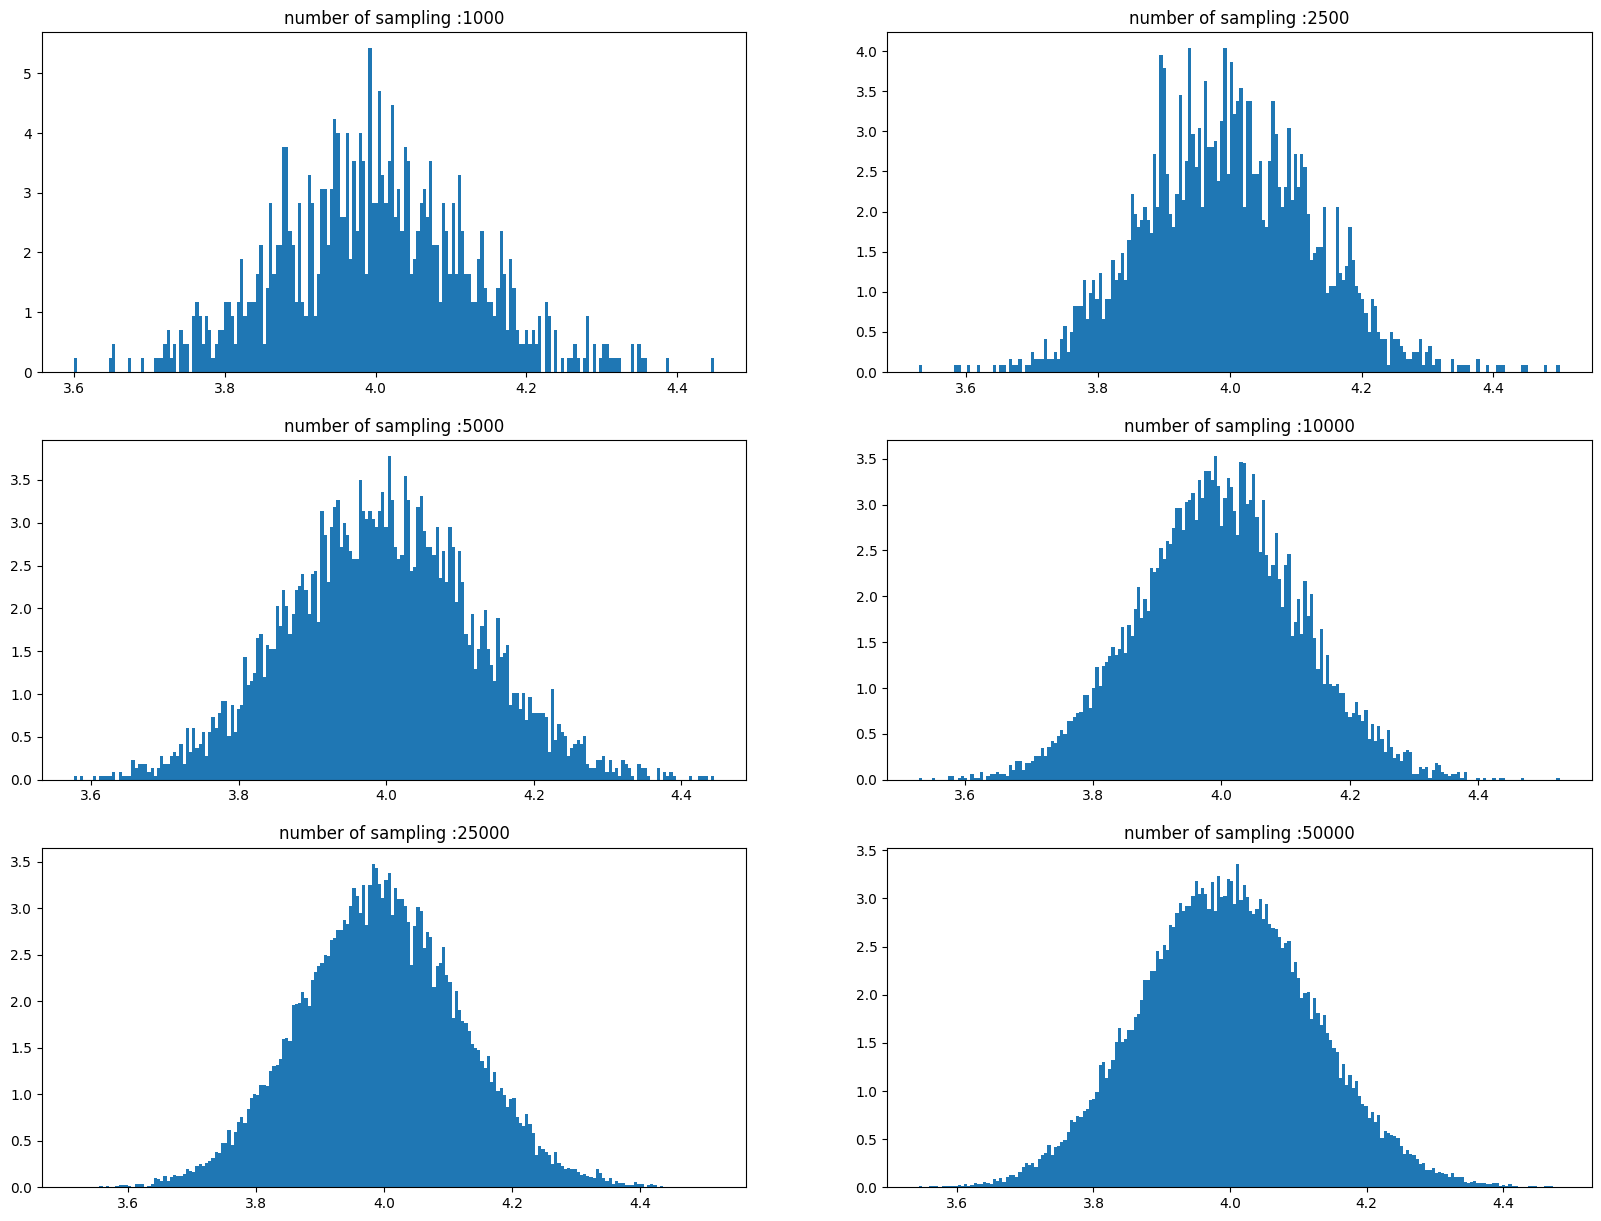

In [7]:
# plot
import matplotlib.pyplot as plt
cols = 2
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(20,15))
n = 0
for i in range(0, rows):
    for j in range(0, cols):
        ax[i, j].hist(meansample[n], 200, density=True)
        ax[i, j].set_title(label="number of sampling :" + str(numofsample[n]))
        n += 1

We can see from the plots that as the number of sampling increases, the distribution becomes smoother. This theorem is extremely powerful because we can apply to any population, so if we have tools to work with normal distribution, we can use that tool with the sample mean of any distribution such as calculate probability using an area under a normal curve.

Standardize the Sample Mean
We can change sample mean distribution into standard normal distribution by subtracting each sample mean with an expected value and dividing by a standard deviation.


Step:
1.) Using the distribution from the last sampling

In [8]:
# use last sampling
sm = meansample[len(meansample)-1]

2.) Calculate the mean and standard deviation of the sample mean.

In [9]:
# calculate start deviation
std = np.std(sm)
# set population mean
mean = np.mean(sm)

3.) Subtract each value by mean and divide it by standard deviation, so the mean and standard deviation of the sample mean is 0, 1 respectively.

In [10]:
# list of standarded sample
zn = []
# for each sample subtract with mean and devided by standard deviation
for i in sm:
    zn.append((i-mean)/std)

4.) Plot the result.

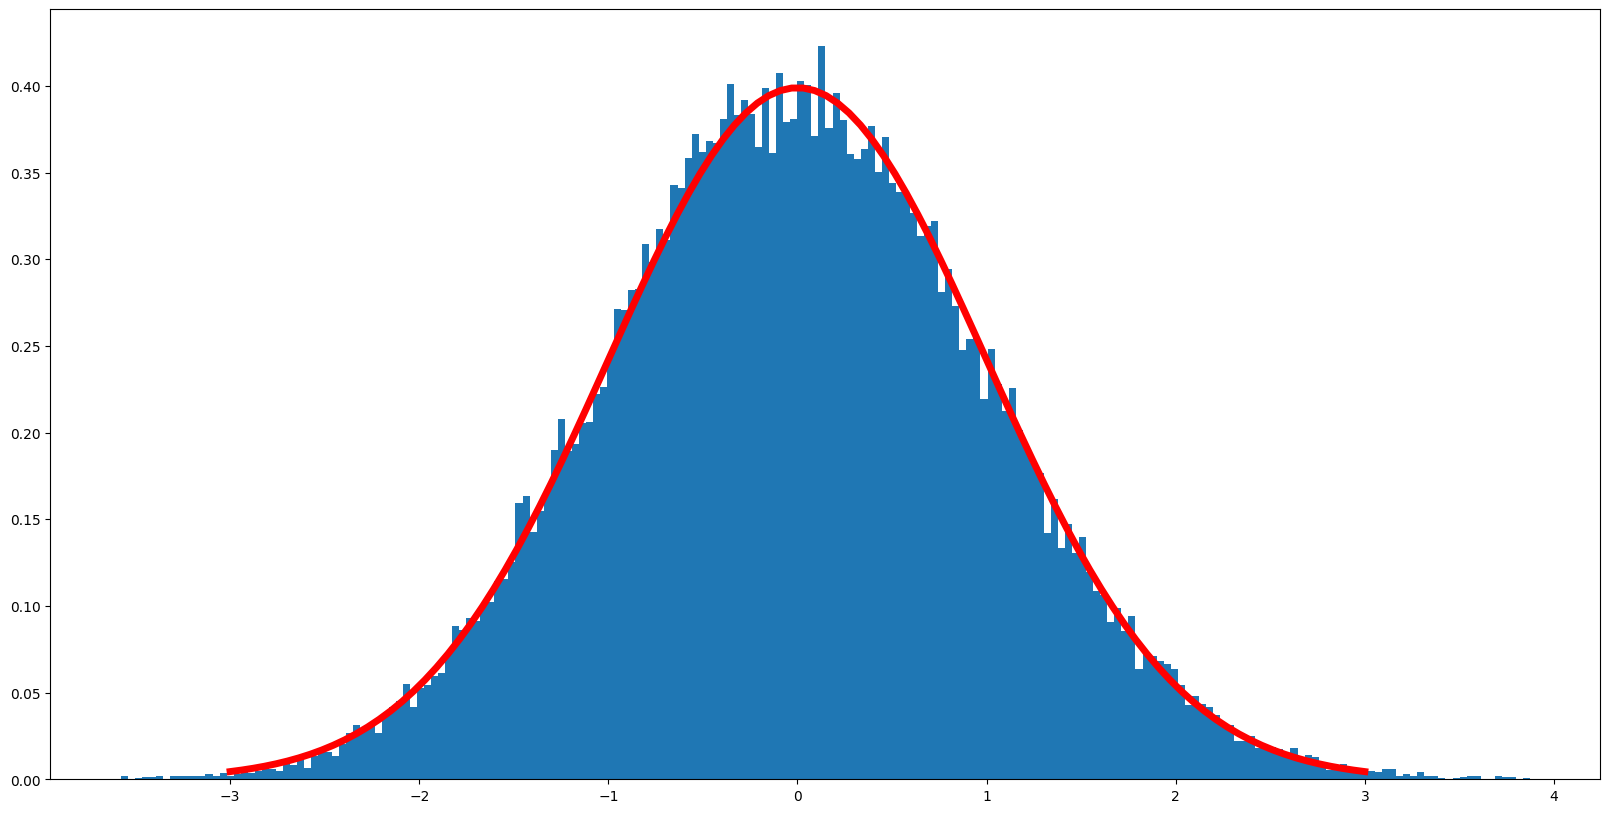

In [13]:
# plot hist
import scipy.stats as stats
plt.figure(figsize=(20,10))
plt.hist(zn, 200, density=True)
# compare with standard normal disrtibution line
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# draw standard normal disrtibution line
plt.plot(x, stats.norm.pdf(x, mu, sigma),linewidth = 5, color='red')
plt.show()

One of the reasons we standardize the sample mean is the complexity of a normal distribution function. We have to integrate the complicated function which can take hours to do, so instead, we standardize the distribution and use the Z table to find an area under the function.

## Sample size
The rule of thumb of sample size is that it should be larger than 30 to make the sample mean distributed normally. However, the theorem still works if the sample size is less than 30 but the population is normally distributed. I will illustrate what will happen if the sample size is less than 30, 30 and greater than 30.
Step:
    
1.) Sample from the same gamma distribution with 1 sample size, calculate the mean and repeat the step 25,000 times. I repeat this step but increase the sample size until it reaches 1,000 sample size.


In [14]:
## sample with different sample size
# list of sample mean
meansample = []
# number of sampling
numofsample = 25000
# sample size
samplesize = [1,5,10,30,100,1000]
# for each sample size (1 to 1000)
for i in samplesize:
    # collect mean of each sample
    eachmeansample = []
    # for each sampling
    for j in range(0,numofsample):
        # sampling i sample from population
        rc = random.choices(s, k=i)
        # collect mean of each sample
        eachmeansample.append(sum(rc)/len(rc))
    # add mean of each sampling to the list
    meansample.append(eachmeansample)

2.) Plot each sample mean.

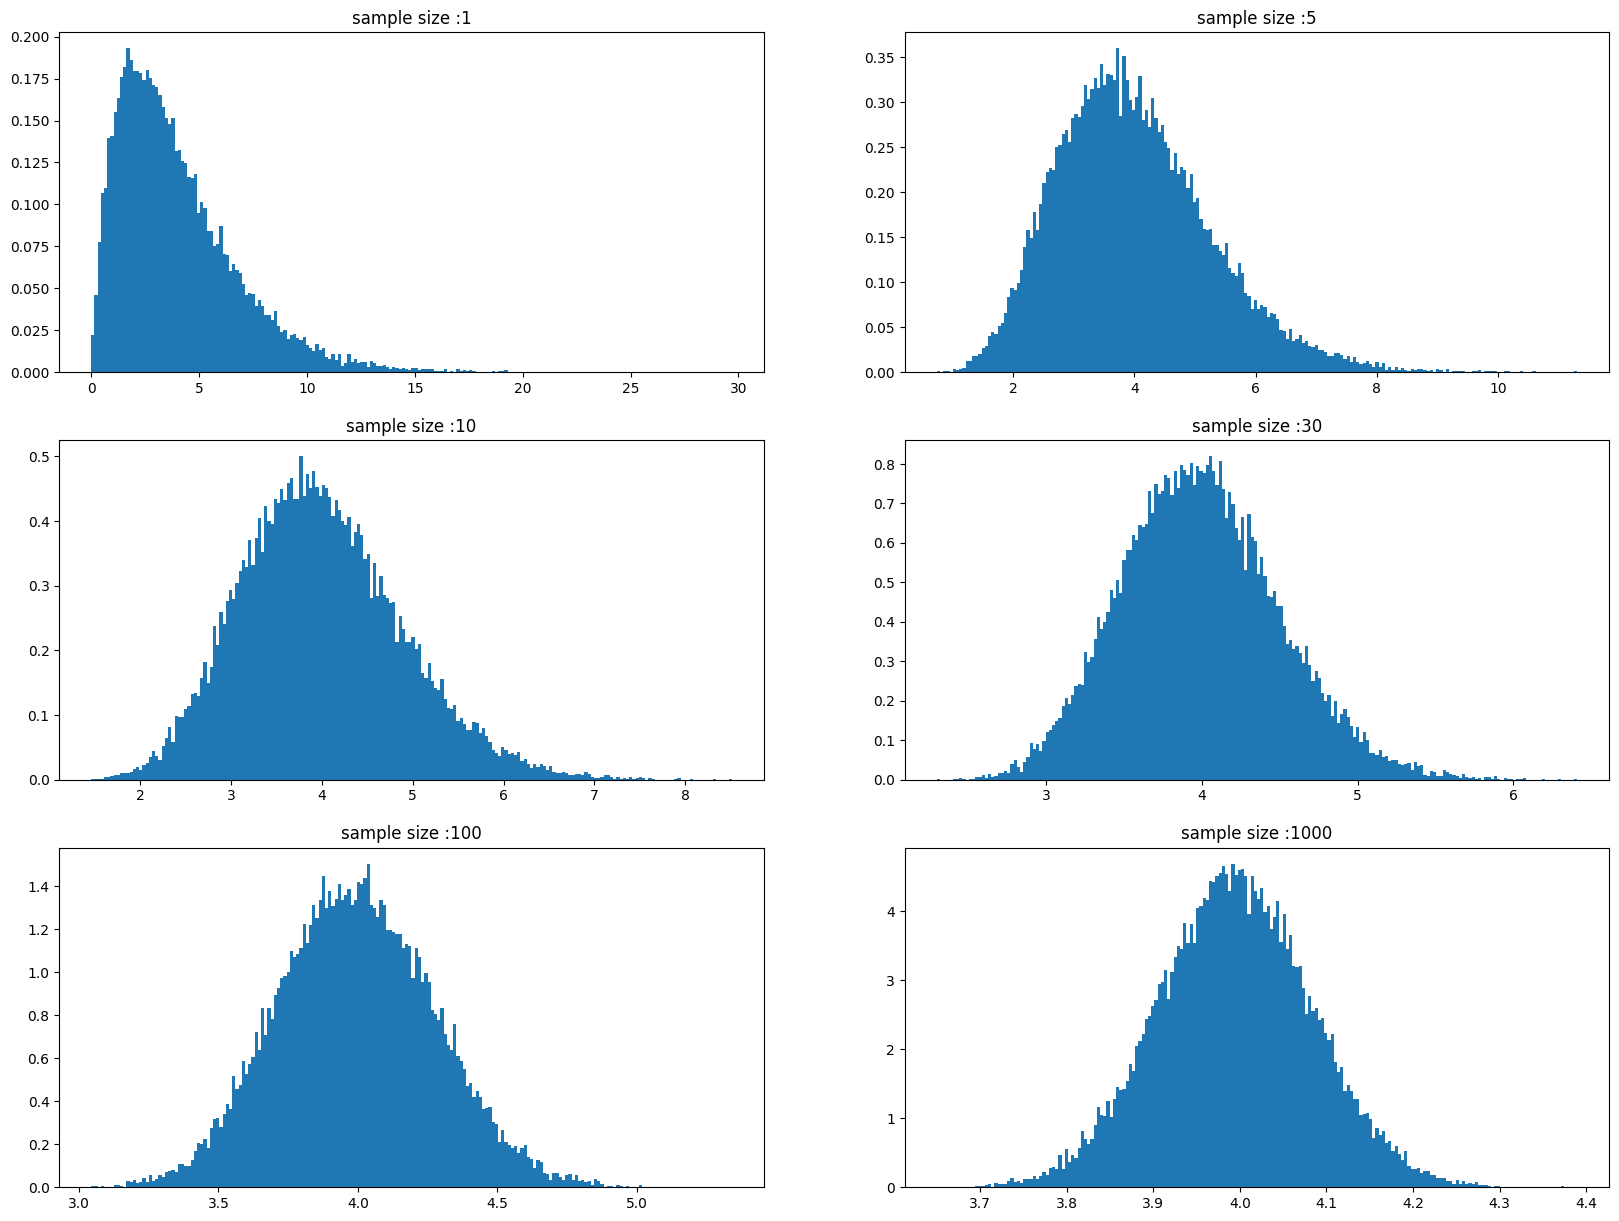

In [15]:
# plot
cols = 2
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(20,15))
n = 0
for i in range(0, rows):
    for j in range(0, cols):
        ax[i, j].hist(meansample[n], 200, density=True)
        ax[i, j].set_title(label="sample size :" + str(samplesize[n]))
        n += 1

From the plot, the distribution of sample size that is less than 30 is not normally distributed.

I will combine this theorem with Chebyshev’s inequality and the weak law of large numbers, but before we go there, let’s look at the expected value and standard deviation of sample means.

The expected value and standard deviation of sample means
Suppose that X is a random variable that is independent and identical distributed with the expected value μ and standard deviation σ. If we sample the X n sample, the expectation and variance of X will be as follow.

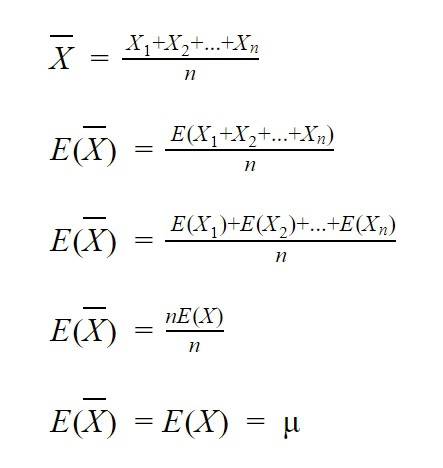

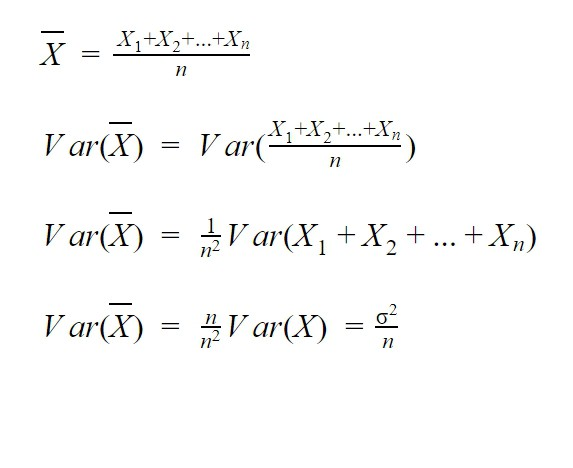

Where n is sample size, n = 10 means we use 10 data and sample mean is an average of 10 data, the expected value and variance can be calculated as above.

In [16]:
## expect value of sample
# use last sampling
sample = meansample[5]
# expected value of sample equal to expect value of population
print("expected value of sample:", np.mean(sample))
print("expected value of population:", shape*scale)
# standard deviation of sample equl to standard deviation of population divided by squre root of n
print("standard deviation of sample:", np.std(sample))
print("standard deviation of population:", scale*np.sqrt(shape))
print("standard deviation of population divided by squre root of sample size:", scale*np.sqrt(shape)/np.sqrt(1000))

expected value of sample: 3.994359908130529
expected value of population: 4.0
standard deviation of sample: 0.08914642122887688
standard deviation of population: 2.8284271247461903
standard deviation of population divided by squre root of sample size: 0.0894427190999916


However, it feels a bit counterintuitive because how one sample can have an expectation and a variance, it is just a number. Well, think about this, suppose I ask you to sample student’s height in a school, you will have to knock every classroom and pick 1 student in the room. Before you go into the room, what is your expectation of the height of the student you will pick? You do not know, right? Then, what if I tell you that the average height of students in this school is 5 feet with variance 4 inches. Now, your expectation of the height of a student before you picks one of them should be 5 feet with variance 4 inches. If you pick 10 students, the expectation of the height of those students would be the sum of expectation of each student, which is the same with value 5 feet, divided by the number of students. Thus, try to think of a sample as a random variable, not a number.

Another thing I want to mention is, according to formula, when the sample size increases the variance of the sample mean will be smaller, so the variance of the sample mean depend on the sample size. If we sample large enough the sample mean will be close to its expectation.

## Convergence in sample means
Chebyshev’s inequality works with a wide class of probability distribution, and it also works with a normal distribution. We can change the inequality for working with sample mean as follows.

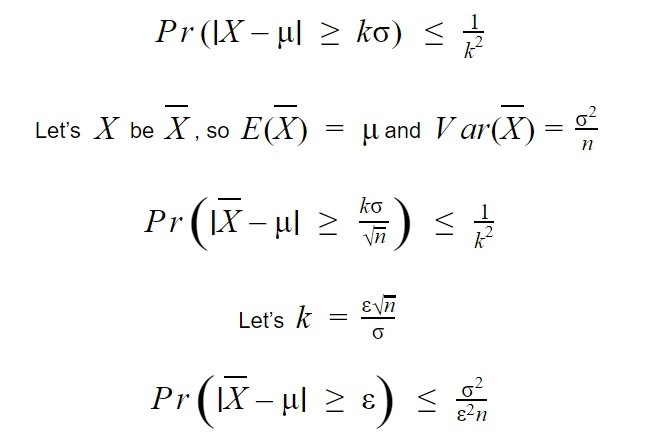

Where X bar is a sample mean, μ is expected values of a sample mean, ε is the margin of error which greater than 0, σ is a standard deviation of the population and n is a sample size.

Using the weak law of larger numbers and this formula, if the sample size goes to infinity, the probability that the difference between the sample mean and expected value is greater than a margin of error converges to zero.

I will use python to show the fact that as a sample size increase the sample mean become closer to the expected value as the following step.

Step:

    1.) Use the same gamma distribution as a population

In [17]:
# build gamma distribution as population
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000000)

2.) Sample from the population using sample size from 10 to 20,000 step by 20, then calculate the difference between the sample mean and the population mean.

In [18]:
## show that as the sample size increases the mean of sample is close to population mean
# set expected values of population
mu = shape*scale # mean
# sample size
samplesize = []
# collect difference between sample mean and mu
diflist = []
# for each sample size
for n in range(10,20000,20): 
    # sample n sample
    rs = random.choices(s, k=n)
    # start count
    c = 0
    # calculate mean
    mean = sum(rs)/len(rs)
    # collect difference between sample mean and mu
    diflist.append(mean-mu)
    samplesize.append(n)

3.) Plot the differences.

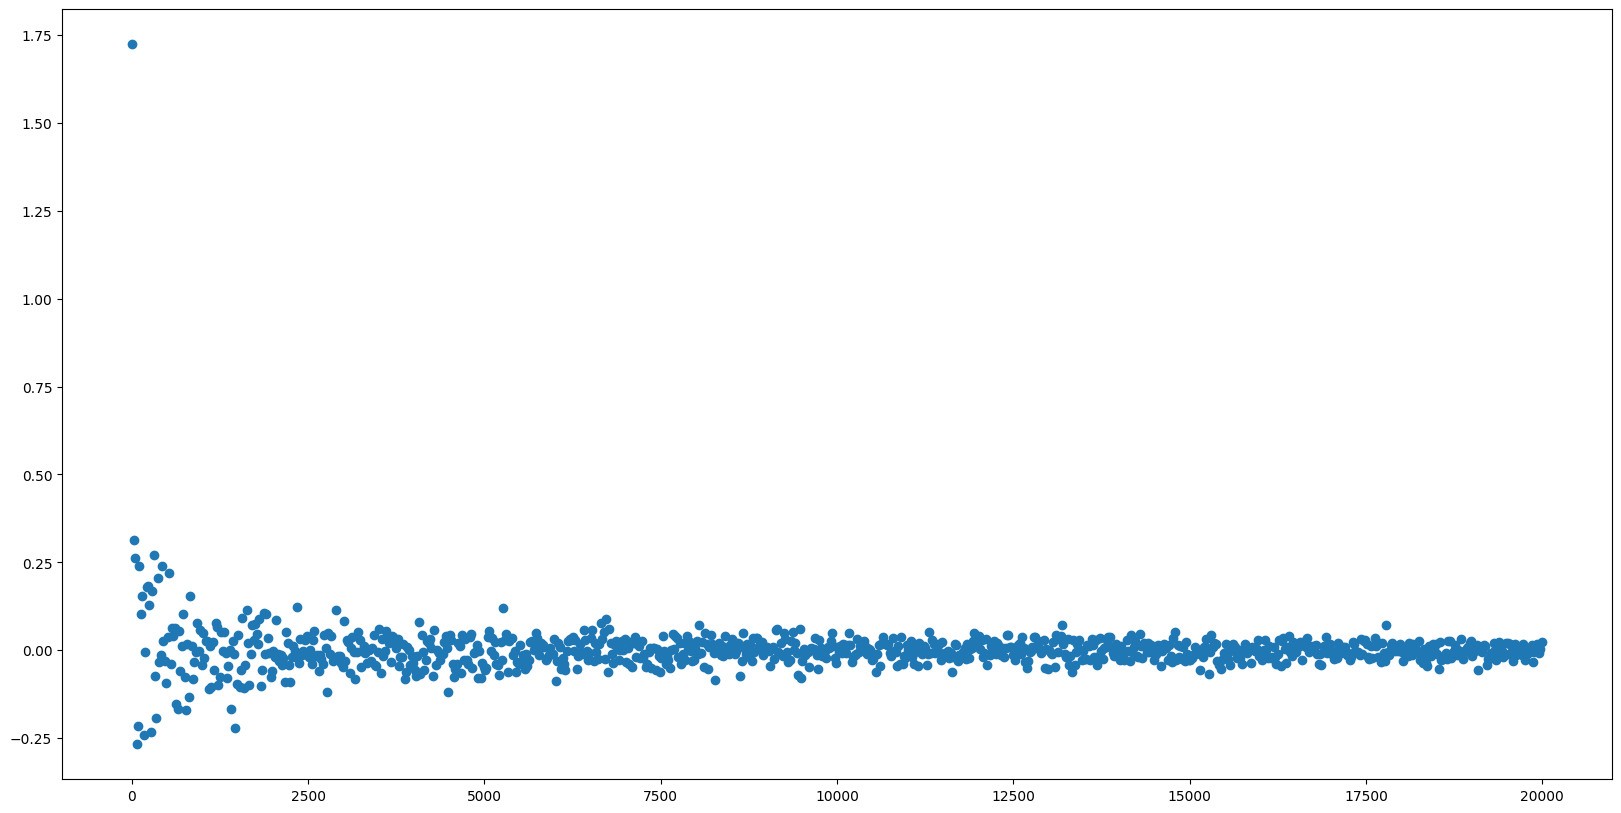

In [19]:
# set figure size.
plt.figure(figsize=(20,10))
# plot each diference.
plt.scatter(samplesize,diflist, marker='o')
# show plot.
plt.show()

We can see that as the sample size increases the difference is decreasing.
We can also use the formula to find a sample size that can keep an error of a sample mean within a range. For example, if we want our sample to be a 1% error with a 95% probability, we can set an inequality to be like this.

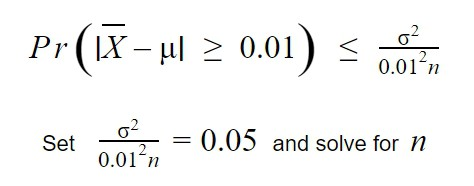

I will plot another graph to show that, the probability, that the difference of the sample means and expectation is larger, that error is decreasing as the sample size increases.

Step:
1.) Use the same gamma distribution as a population, and set error to be 0.05

In [20]:
# build gamma distribution as population
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)  
mu = shape*scale # mean
s = np.random.gamma(shape, scale, 1000000)
# margin of error
epsilon = 0.05

2.) Sample from the population 100 times using sample size from 100 to 10,100 step by 500, then count the sample that has the differences of mean and expected value larger than error.

3.) Calculate the probability of each sample size, and add the probability plot

In [21]:
# list of probability of each sample size
proberror = []
# sample size for plotting
samplesize = []
# for each sample size
for n in range(100,10101,500): 
    # start count
    c = 0
    for i in range(0,100):
        # sample n sample
        rs = random.choices(s, k=n)
        # calculate mean
        mean = sum(rs)/len(rs)
        # check if the difference is larger than error
        if abs(mean - mu) > epsilon:
            # if larger count the sampling
            c += 1
    # calculate the probability
    proberror.append(c/100)
    # save sample size for plotting
    samplesize.append(n)

4.) Plot the probabilities.

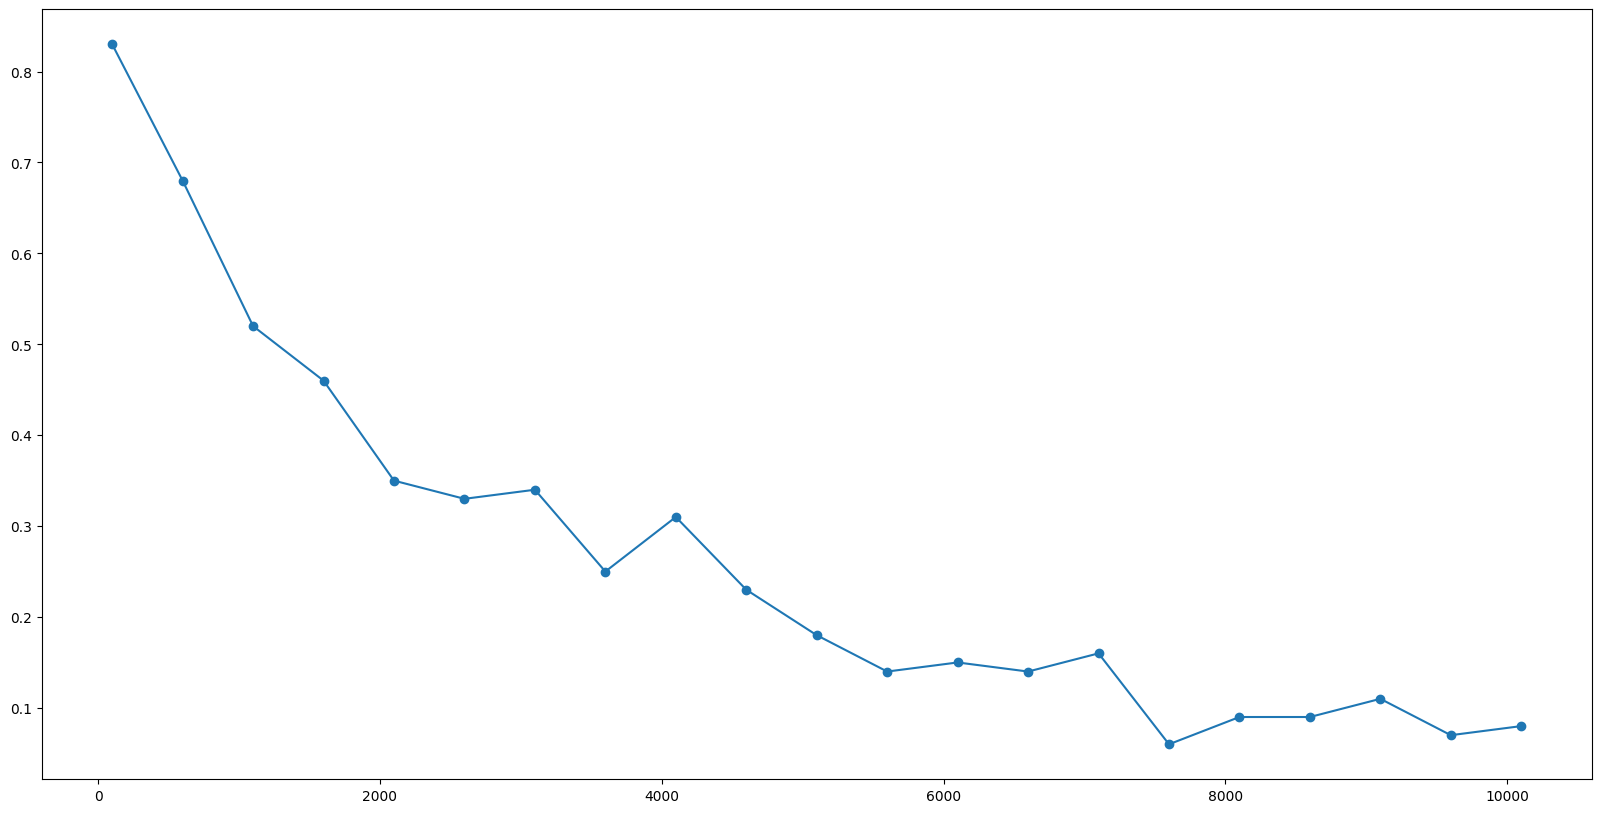

In [22]:
# set figure size.
plt.figure(figsize=(20,10))
# plot each probability.
plt.plot(samplesize,proberror, marker='o')
# show plot.
plt.show()

The things you should take away from this notebook are:
- The sample mean will be a normal distribution regardless of the population mean.
- As the sample size increases, the variance of the sample mean becomes smaller.
- Therefore, the probability that the sample mean is far from expectation is also decreasing as a sample size increases.